In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/groceries/groceries - groceries.csv
/kaggle/input/groceries/groceries.csv


In [2]:
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for performing MBA
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
#reading data
data=pd.read_csv('../input/groceries/groceries - groceries.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')

Shape of data: 9835 rows and 33 columns


In [4]:
#let's check a glance of dataset
pd.set_option('max_columns', 35)
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


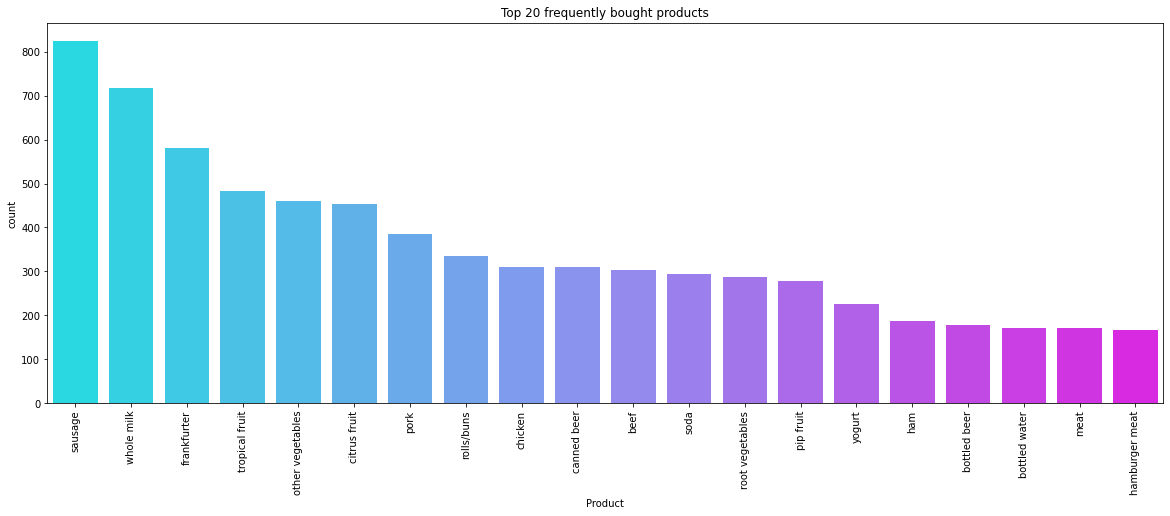

In [5]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

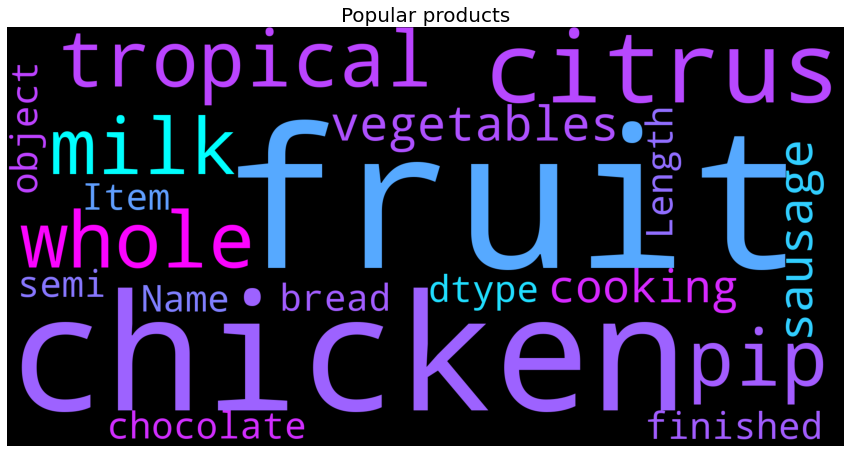

In [6]:

#let's check popular products
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='cool').generate(str(data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

In [7]:

#let's create a list of list of transaction
records = []
for i in range(0, len(data)):
    records.append([str(data.values[i,j]) for j in range(1, data.values[i, 0]+1)])

In [8]:
#Let's analyze the no. of items wrt each transaction
counts = [len(record) for record in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
particular transaction having a maximum of 32 items in it


In [9]:
#Let's encode the created list of list like onehot encode

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
onehot = te.fit_transform(records)
onehot = pd.DataFrame(onehot, columns = te.columns_)

In [10]:

#Shape of encoded onehot dataset
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 169 columns


In [11]:
#Due to complexity we are reducing the no of items by selecting particular items alone
onehot = onehot.loc[:, ['bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'syrup',
                    'sweet spreads', 'beverages', 'berries', 'beef', 'bathroom cleaner', 'baking powder', 'bags',
                    'baby food', 'baby cosmetics', 'Instant food products', 'tea', 'toilet cleaner', 'vinegar', 'waffles', 'whisky',
                    'white bread', 'white wine', 'yogurt', 'zwieback', 'whole milk', 'whipped/sour cream', 'abrasive cleaner']]

In [12]:
#Shape of encoded onehot dataset after reducing no. ofitems
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 28 columns


In [13]:
#Let's generate the frequent itemset using apriori with minimum support of 0.01%
#maximum item per transaction restricted to 3

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(onehot, min_support=0.0001, use_colnames=True, max_len=3)
frequent_itemsets

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.004169,(brandy)
3,0.064870,(brown bread)
4,0.055414,(butter)
...,...,...
1006,0.010880,"(whole milk, whipped/sour cream, yogurt)"
1007,0.000712,"(whole milk, abrasive cleaner, yogurt)"
1008,0.000102,"(abrasive cleaner, whipped/sour cream, yogurt)"
1009,0.000203,"(whole milk, zwieback, whipped/sour cream)"


In [14]:
#Generating Association rule with mlxtend's association_rules
rules=association_rules(frequent_itemsets)

In [15]:
rules.shape

(164, 9)

In [16]:

#Pruning the generated rules using multiple filters

targeted_rules = rules[rules['antecedents'] == {'baby food'}].copy()

In [17]:

filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.85) &
                                (targeted_rules['lift'] > 1.00)]

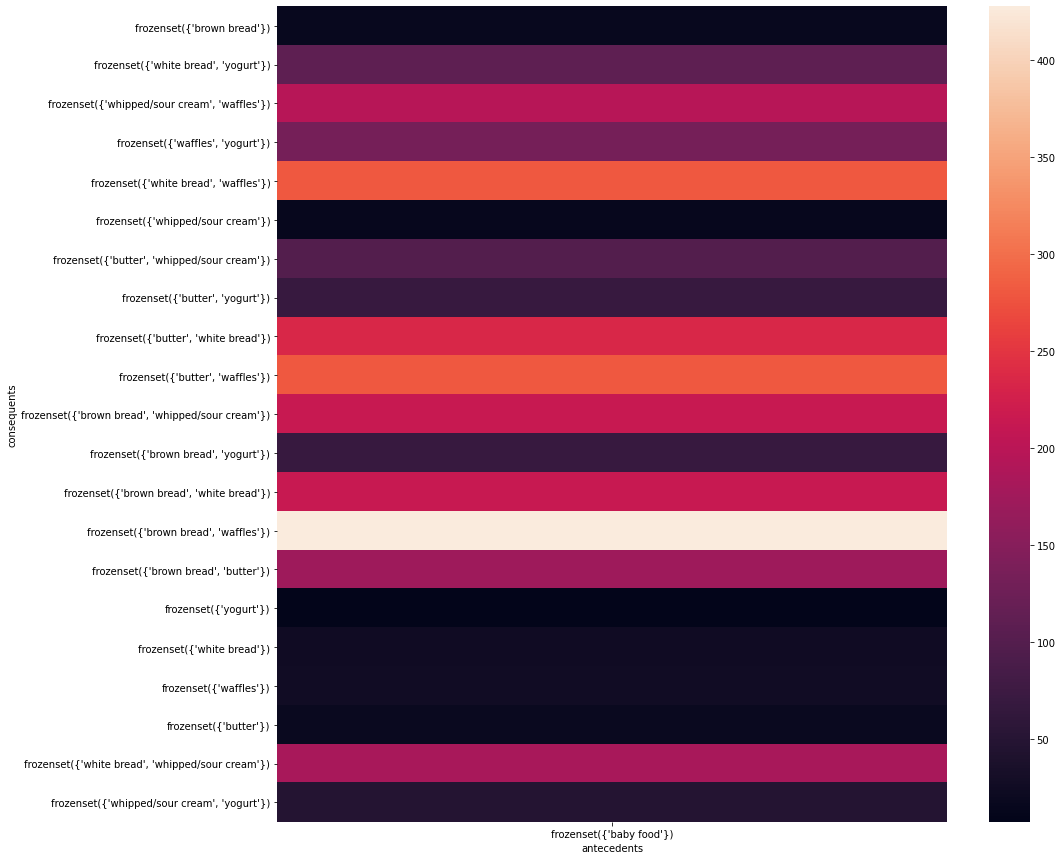

In [18]:
#let's analyse the 'baby foods' relevent consequents

support_table = filtered_rules.pivot(index='consequents', columns='antecedents', values='lift')
sns.heatmap(support_table)

In [19]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
coords = rules[['antecedent','consequent','rule']]

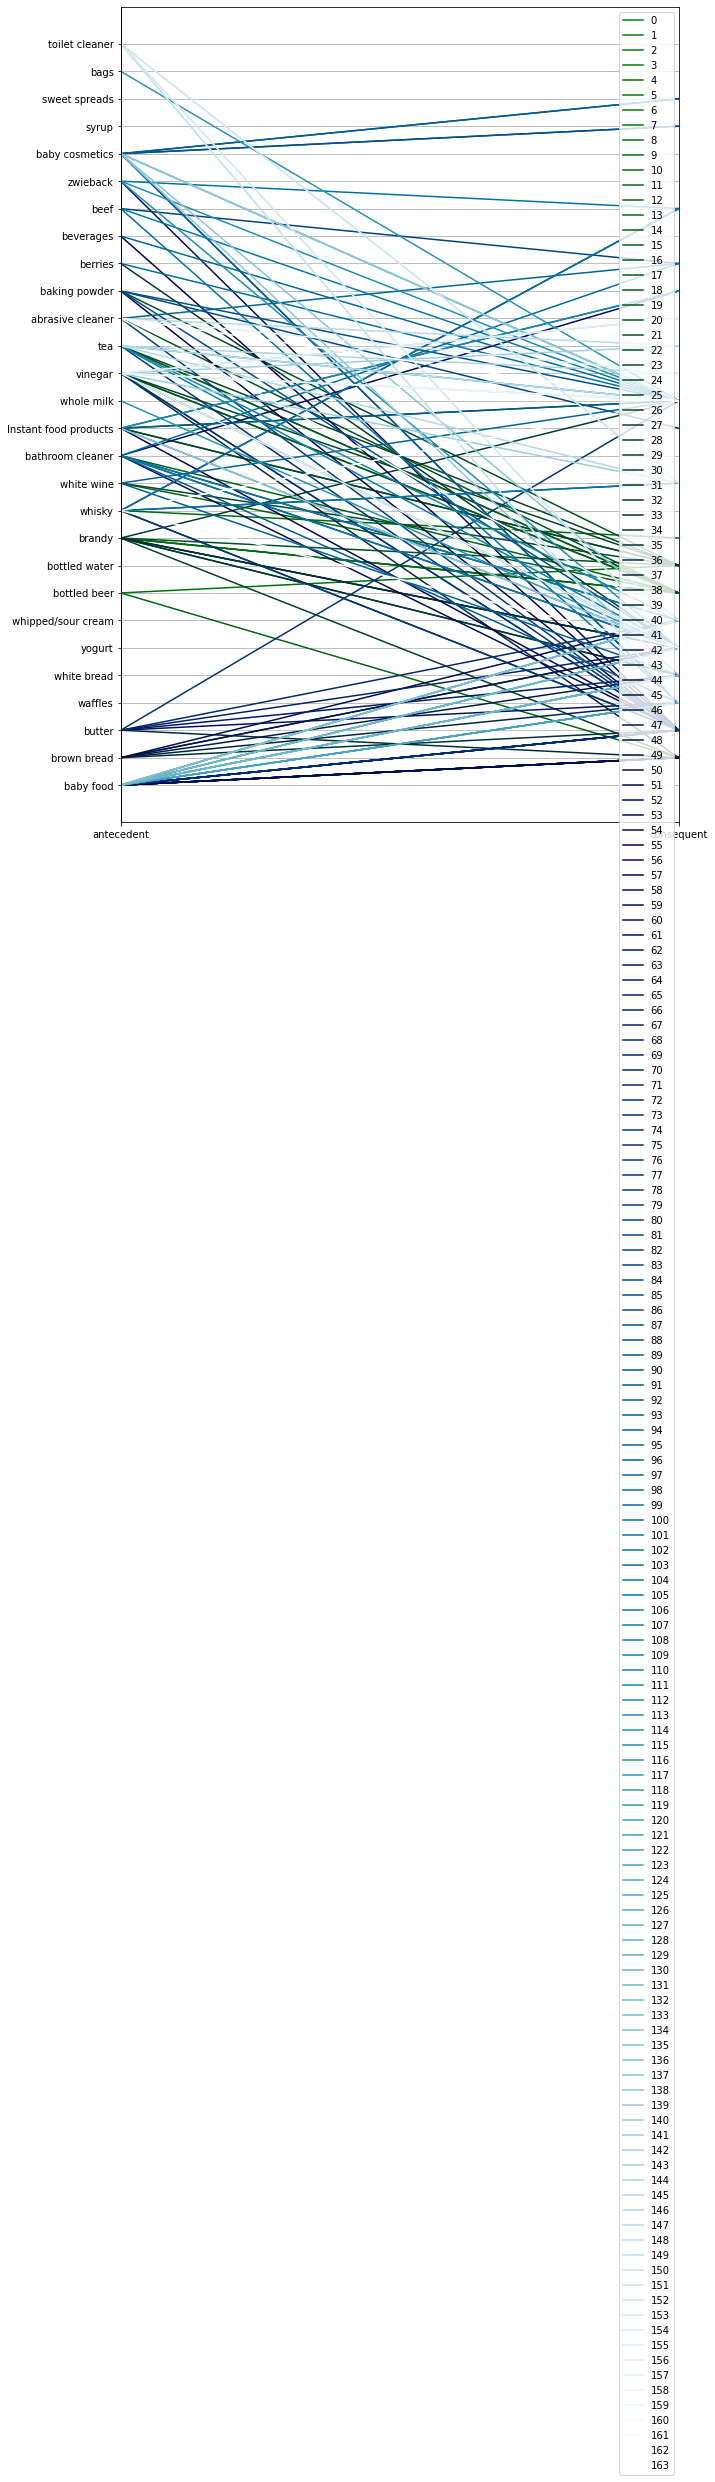

In [20]:
# Generate parallel coordinates plot

from pandas.plotting import parallel_coordinates

plt.rcParams['figure.figsize']=10,15
parallel_coordinates(coords,'rule', colormap = 'ocean')
plt.show()